<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint3/Module2/DS_132_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Model the relationship of multple predictor variables to a single outcome.
- Conduct a t-test to determine the significance of individual variables in the model.
- Compare model fit using R-squared

# Objective - Model the relationship of multiple predictor variables to a single outcome

### Returning to our forensic science example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)?




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset.

**We wish to determine if we can improve our model of the relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [2]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


At the point we left off yesterday, we'd tested for and found a statistically significant relationship between long bone nitrogen composition and interment time.

The null hypothesis is that they are _not related__________.  The alternative hypothesis is that they __are related_________.  In symbolic notation:

Ho: $\beta_1$ __= 0____

Ha: $\beta_1 \neq$ __0________

In [3]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X
model = ols("Time ~ Nitro", data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.05e-05
Time:                        10:26:02   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

Today let's take a look at some of the information about model fit displayed in the upper right hand side of the top box.

**R-squared (also abbreviated $R^2$) is equal to the square of the correlation coefficient.  It's a number between 0 and 1 that is often expressed as a percent.**



**The interpretation of R-squared is "the percent of the variability in the y variable that is explained by differences in the x variable(s)".**


In this case, $R^2$ = ___0.45_________.  The interpretation is that __45%______ of the variability in interment length is explained by differences in nitrogen composition of the long bones.



That means that __55%________ of the variability in interment time remains unexplained by the model.  

This remaining variablility can be seen in the scatterplot where we have skeletons with the same nitrogen compositon but different interment times.

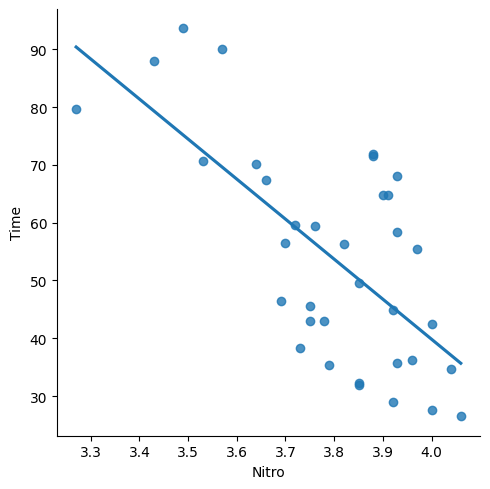

In [4]:
#Use Seaborn to create the scatterplot and overlay the regression line

import seaborn as sns
sns.lmplot(x="Nitro", y="Time", data=longbones, ci=None)
#Turn off CI plotting for today


How do we address this unexplained variability?  

??????????

# Objective - Conduct a t-test to determine the significance of individual variables in the model

We can do this by adding additional terms to our model and testing to see if they are statistically significant.


Simple linear regression model: $\hat{y} = \beta_0 + \beta_1x$

Multiple regresssion model: $\hat{y} = \beta_0 + \beta_1x + \beta_2x + \beta_3x +...$

As with simple linear regression, we use t-tests to determine if model features are statistically significantly associated with the target.


Let's start by looking at Lime, which indicates if the body was buried with Quicklime or not.  


We can ask the question, "Does burial with Quicklime change the relationship between long bone nitrogen composition and interment time?"

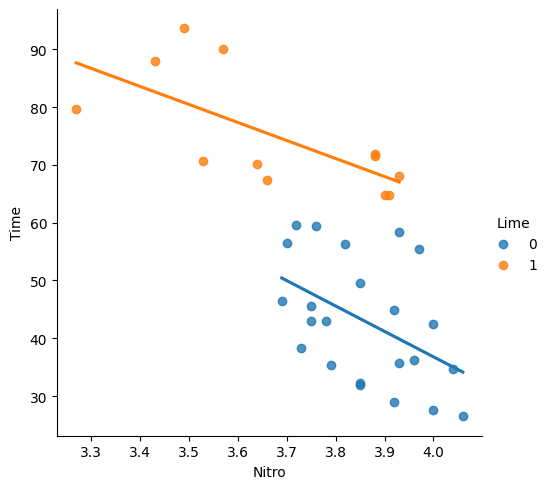

In [5]:
#Color the points differently depending on if the body was buried with Quicklime or not.

sns.lmplot(x="Nitro", y="Time", data=longbones, ci=None, hue='Lime')


There does seem to be a different pattern in the relationship between nitrogen composition and interment time depending on if the body was buried with Quicklime, and we can test this claim formally using a hypothesis test.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime

Now we can test the null hypothesis that burial with Quicklime is not associated with interment time against the alternative hypothesis that burial with Quicklime is associated with interment time.  In symbolic notation:

Ho: $\beta_2$ = ___0______

Ha: $\beta_2 \neq$ ____0______

Because lime is an indicator variable that assigns observations to a particular category (as opposed to a continuous measurment), we have to specify that in the model with C().

> **Categorical variable, add C(variable) in the ols model code**







In [15]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X
model = ols('Time ~ Nitro + C(Lime)', data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     55.56
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.90e-11
Time:                        11:35:48   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             256.6
Df Residuals:                      32   BIC:                             261.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      180.4695     38.386      4.701   

Now we see "Lime" appear in the model under Nitro alongside the model coefficient, standard error, t-test, p-value and CI.

In [7]:
model.params

Intercept       180.469490
C(Lime)[T.1]     25.450471
Nitro           -35.625755
dtype: float64

Both Nitro and Lime are statistically significant predictors of interment time so it makes sense to include both of them in our statistical model.

We can write the model using the coefficients shown in the table as:

$\hat{y}$ = 180.47 - 35.63(Nitro) + 25.45(Lime)



Let's look more closely at what is going on here.  The model is setting up a set of parallel lines - one for when Lime = 0 and one for when Lime = 1.

When Lime = 0

$\hat{y}$ = 180.47 - 35.63(Nitro) + 25.45(0)

$\hat{y}$ = 180.47 - 35.63(Nitro)


When Lime = 1

$\hat{y}$ = 180.47 - 35.63(Nitro) + 25.45(1)

$\hat{y}$ = 205.92 - 35.63(Nitro)


### Example of regression with an indicator variable:

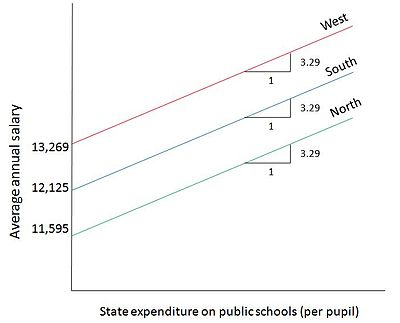

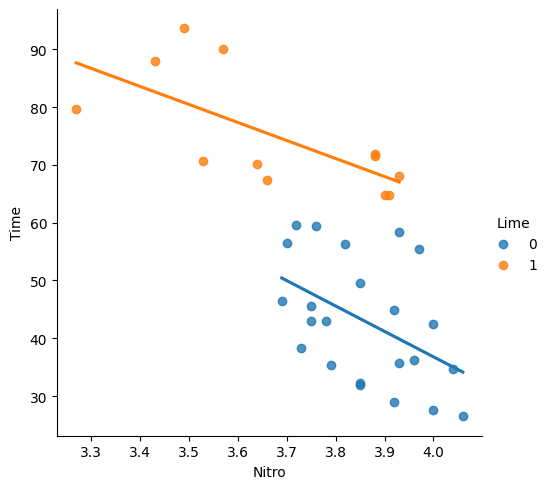

In [8]:
#Color the points differently depending on if the body was buried with Quicklime or not.
sns.lmplot(x="Nitro", y="Time", hue="Lime", data=longbones, ci=None)

When we have a model with more than one feature, we talk about each one being significantly associated with the target **after taking into account the effects of the other variables**.

After taking into account long bone nitrogen composition, burial with Quicklime is statistically significnatly associated with interment time.

And vice versa.

After taking into account burial with Quicklime, long bone nitrogen composition is statistically associated with interment time.

Because we now have two significant predictors in our model instead of just one, we'd expect the percent of variability in y to be higher for the model with both nitrogen composition and Quicklime compared to the model with just nitrogen composition.

# Objective - Compare model fit using R-squared

The output above gives us multiple measures comparing model predictive ability and fit, but we are going to continue to focus on $R^2$ (AIC, BIC and log likelihood are all less easily interpretable measures of model fit).





However, $R^2$ on its own has a limitation. It will *usually* go up when you enter more factors in the model, even if they aren't statistically significant.

Adjusted $R^2$ penalizes you just a little bit for adding in new model terms, so it will only increase if the new term really adds to the predictive ability of the model.

In the model with just nitrogen composition, adjusted $R^2$ = 0.433

In the model with both nitrogen composition and burial with Quicklime, adjusted $R^2$ = 0.762

That's a huge ____increase_________________ in predictive ability!


Now we can say that about 76% of the variability in interment time can be explained by differences in long bone nitrogen composition and use of Quicklime at burial.

Can we do even better?????

Let's add burial depth to the model.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime + $\beta_3x$Depth

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with Quicklime - burial depth is not associated with interment time against the alternative hypothesis is that burial depth is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

In [9]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro + C(Lime) + Depth', data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     35.88
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.34e-10
Time:                        11:13:37   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             258.6
Df Residuals:                      31   BIC:                             264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      180.4700     39.003      4.627   

In this case we see that we _fail to reject the null hypothesis_ and we conclude that - after accounting for nitrogen composition and burial with Quicklime - burial depth is not associated with interment time.

Looking at the adjusted $R^2$, we see the predictive ability of this model falls a tiny bit to _____0.755__________.

We will choose ___not to__________ include burial depth in our model of interment time.  Our current best model remains:

$\hat{y}$ = 180.47 - 35.63(Nitro) + 25.45(Lime)



We have one more variable to consider.  Let's add age at the time of death to the previous model and see if that adds to the predictive ability.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime + $\beta_3x$Age

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with Quicklime - age at the time of death is not associated with interment time against the alternative hypothesis is that age at the time of death is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

In [10]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro + C(Lime) + Age', data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     35.91
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.30e-10
Time:                        11:18:05   Log-Likelihood:                -125.30
No. Observations:                  35   AIC:                             258.6
Df Residuals:                      31   BIC:                             264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      178.8066     40.704      4.393   

Again we __fail to reject___ and we conclude that - after accounting for nitrogen composition and burial with Quicklime - age at the time of death is not associated with interment time.  The adjusted $R^2$ also __dropped a little___ as when we added burial depth.

In addition to what we call main or additive effects (things like Lime and depth added to the model with plus signs), we can also test for interaction effects.  i.e. Should the lines describing the relationship of nitro to interment time be parallel or have their own slopes?

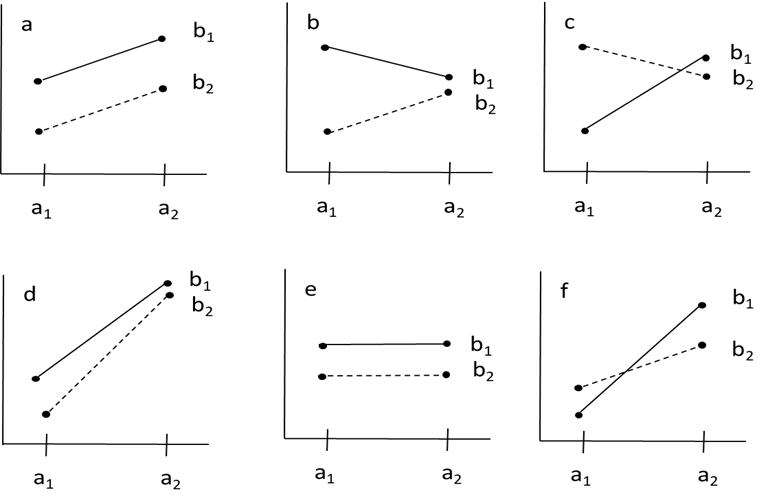

**Check for interaction effects.**



In [12]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro + C(Lime) + Nitro*C(Lime)', data=longbones).fit() # we add the product of the two independent variables

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     36.43
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.79e-10
Time:                        11:24:17   Log-Likelihood:                -125.11
No. Observations:                  35   AIC:                             258.2
Df Residuals:                      31   BIC:                             264.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            212.7250     65



*   Adjusted R2 dropped from 0.76 to 0.758 only
*   But now C(Lime) p-value shot up to 0.776 after the interaction of Nitro & C(Lime) is added, both fail together!

*   We can comfortably conclude that there is no real interaction between Nitro and Quicklime





___No__ interaction between Nitro and Lime

Based on the data we have, the best model to predict interment time of a skeleton is:

$\hat{y}$ = 180.47 - 35.63(Nitro) + 25.45(Lime)

Let's play CSI one more time and use it to make predictions about how long a body has been interred for different values of long bone nitrogen composition and Quicklime application.

- A body that was not buried with Quicklime that has 3.88 g of nitrogen /100g of bone remaining in the long bones of the skeleton.

In [14]:
# When using model.params that has categorical variable OLS, it will become the first feature, so be careful with we assign values!

In [16]:
#Make sure we're working with the correct model
model = ols('Time ~ Nitro + C(Lime)', data=longbones).fit()

In [17]:
model.params

Intercept       180.469490
C(Lime)[T.1]     25.450471
Nitro           -35.625755
dtype: float64

In [18]:
#Specify the values of x we'd like to predict
x1 = 0 # first x1 is C(lime), and body wasn't buried in lime, so it's 0
x2 = 3.88 # x2 refers to Nitro

#Extract the slope and intercept values from the model parameters
intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

# or
# intercept, slope1, slope2 = model.params

#Use the model coefficients and plug the new value of x into the regression equation
predicted = intercept + slope1*x1 + slope2*x2

print(predicted)


42.24156065638019


We estimate this body has been buried for about __42.24 years____________

* A body that was buried with Quicklime and has 3.59 g of nitrogen per 100g of bone remaining in the long bones of the skeleton.

In [ ]:
#Make sure we're working with the correct model
model = ols('Time ~ Nitro + C(Lime)', data=longbones).fit()

In [19]:
#Specify the values of x we'd like to predict
x1 = 1
x2 = 3.59

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

#Use the model coefficients and plug the new value of x into the regression equation
predicted = intercept + slope1*x1 + slope2*x2

print(predicted)


78.02350105537052




---



What happens if I have a lot - like thousands - of potential features?

###The curse of dimensionality!

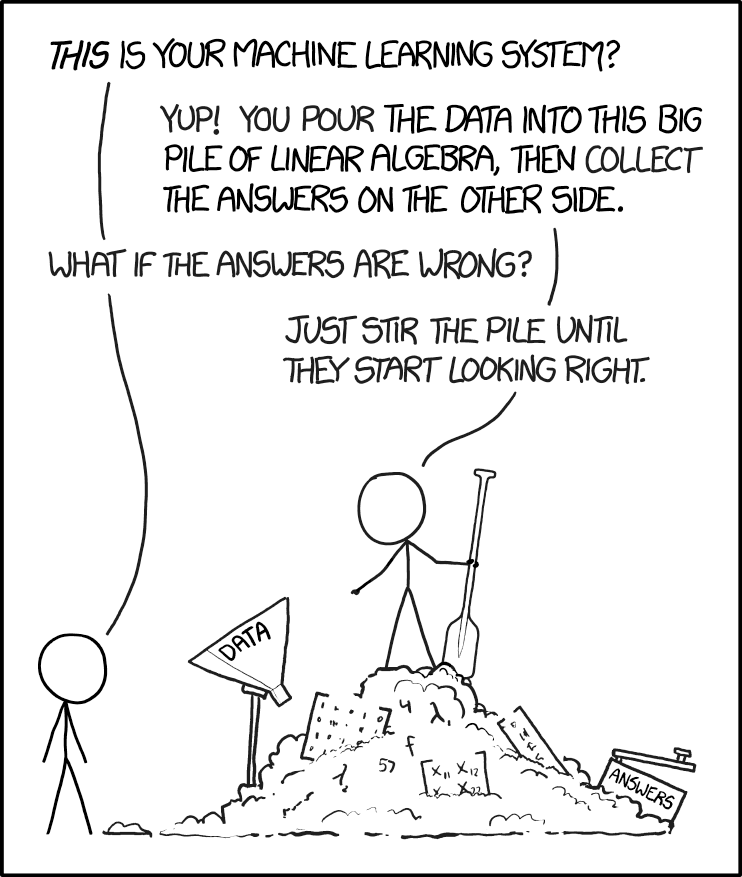

Regression and other machine learning methods do not work well if your dataset contains more columns than rows, aka too many variables and not enough data

There are a few possible ways to handle this situation:
1. Eliminate featurs that you know won't affect your outcome (use my domain knowledge)

2. Interactions between the features, combine any features into more adequate features

3. principal component analysis. Dimensionality reduction.

#Let's return to the sleep example

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset.


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

We've determined that the log of life expenctancy and the log of gestation time were all *univariably* associated with time spent in dreaming sleep.

In [ ]:
#Calculate the log of life expenctancy, and gestation time.
import numpy as np

sleep['Log_life'] = np.log(sleep['Life'])
sleep['Log_gest'] = np.log(sleep['Gest'])

sleep.head()

Let's take a look at the R-squared for a model with just gestational time and then a model with both gestational time and life expectancy.

In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest', data=sleep).fit()

#Print the model summary
print(model.summary())

In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + Log_life', data=sleep).fit()

#Print the model summary
print(model.summary())

Life expectancy is not associated with dreaming sleep after accounting for gestational time.  

Sometimes this happens if you try to add in two features that are highly correlated with each other.  This problem is called multicollinearity.  

Let's see if life expectancy and gestational time are correlated.

In [ ]:
import scipy.stats as st

st.pearsonr(sleep['Life'], sleep['Gest'])

In [ ]:
sns.lmplot('Life','Gest',data=sleep,ci=None)

It does look like they are ____________ correlated with each other.  This means that they aren't really contributing separate information to the model.

What do do?  Include the one with the highest predictive ability.

In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_life', data=sleep).fit()

#Print the model summary
print(model.summary())

The r-squared for ________________, while not great, is definitely higher than the r-squared for ____________________.

What about danger index?  - We'll focus on that because it is a feature that has been engineered to combine the exposure and predation index questions.




In [ ]:
#Boxplot of danger index and sleep
import seaborn as sns

sns.boxplot(x='Danger',y='Parasleep',data=sleep)

Definitely seems like __________________

Again, this would model the relationship of gestational time to dreaming sleep using multiple parallel lines for each danger index

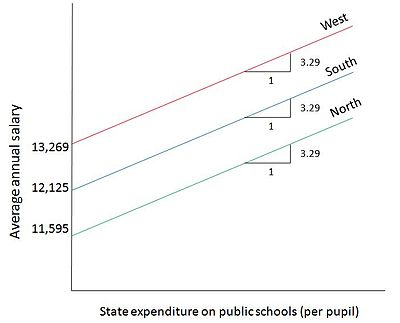

In [ ]:
sns.lmplot('Log_gest','Parasleep',hue='Danger',data=sleep,ci=None, fit_reg=False)

In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + C(Danger)', data=sleep).fit()

#Print the model summary
print(model.summary())


The predictive ability of the model is ________________ by adding in the danger index.  Now the adjusted $R^2$ is ____________.  About _______________.

We can interpret the coefficient term for each of the danger index categories is the additional amount of dreaming sleep we expect animals in each danger category to get compared to animals in danger category 1.

We know that we are comparing to danger catetgory 1 because that's the category that is missing.


Because the coefficients are all negative numbers, we can see that having a higher danger index corresponds to _________________.

Is it possible that there is an interaction?

In [ ]:
sns.lmplot('Log_gest','Parasleep',hue='Danger',data=sleep,ci=None)

Looks like gestational time doesn't really matter in danger categories 4 and 5 but it does in 1, 2 and 3 (danger catetgory 4 and 5 are the most at risk).

In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + C(Danger) + Log_gest*C(Danger)', data=sleep).fit()

#Print the model summary
print(model.summary())


That's a lot of output, but let's look at a couple different things.

1. The R-squared _____________

2. We don't have to interpret every single p-value in our model results.  It can be enough to say that gestational time is important, danger level is important and that gestational time has a different impact on dreaming sleep for mammals that experience different amounts of danger.

3. What's going on with gestational time?  _________________

###One final word of warning:

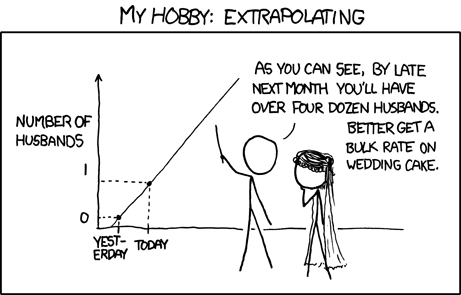

## Now with SKLearn, great with multiple features!

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [24]:
X = longbones[['Nitro', 'Lime']].values # has to be uppercase X
# double [[]] creates a matrix
X

array([[3.88, 1.  ],
       [3.53, 1.  ],
       [3.93, 1.  ],
       [3.88, 1.  ],
       [3.64, 1.  ],
       [3.97, 0.  ],
       [3.96, 0.  ],
       [3.69, 0.  ],
       [3.75, 0.  ],
       [3.75, 0.  ],
       [3.92, 0.  ],
       [3.76, 0.  ],
       [3.93, 0.  ],
       [3.7 , 0.  ],
       [3.82, 0.  ],
       [3.78, 0.  ],
       [4.  , 0.  ],
       [3.92, 0.  ],
       [3.79, 0.  ],
       [3.49, 1.  ],
       [3.57, 1.  ],
       [3.43, 1.  ],
       [3.27, 1.  ],
       [3.66, 1.  ],
       [3.9 , 1.  ],
       [3.91, 1.  ],
       [3.73, 0.  ],
       [3.72, 0.  ],
       [3.85, 0.  ],
       [3.85, 0.  ],
       [4.06, 0.  ],
       [4.04, 0.  ],
       [4.  , 0.  ],
       [3.93, 0.  ],
       [3.85, 0.  ]])

In [25]:
y = longbones['Time']
lr.fit(X,y)

LinearRegression()

Instead of using OLS, we can just type a simple few lines of code to get everything using sklearn. Results are the same as model.params from OLS!

In [30]:
# to predict outcome
lr.predict([[3.88, 0]])

array([42.24156066])

In [28]:
# to get coefficients
lr.coef_

array([-35.62575511,  25.45047142])

In [29]:
# get intercept
lr.intercept_

180.46949049603055

In [31]:
# to get R2 score
lr.score(X, y)

0.7764018072175306